In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different mesurement units. For ex; Pounds,meters,miles etc.

Standardization of a variable means centering the variable at zero. z = (x-x_mean)/std

In [4]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
cols_to_use = ['Survived', 'Pclass', 'Age','Fare']
df = df[cols_to_use]
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [8]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#As the age column has NAN values, I replace those values with the median of the column for better modelling.
df['Age'].fillna(df.Age.median(),inplace = True)

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [11]:
# Independent and Dependent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
X # My dependent Features

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [13]:
y # my independent features

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [16]:
# To perform standardisation: We use the Standardscalar from sklearn library
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [19]:
X_test_scaled = scaler.transform(X_test)
# Here I don't use fit_transform as we have to apply the same mean and variance that was obtained for training data to the test data

In [20]:
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [21]:
# Model building 
# fit for training and predict for test 

In [22]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [23]:
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
classification.predict(X_test_scaled)
# Here we get the prediction for Survived

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

In [26]:
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Survived', 'Pclass', 'Age', 'Fare'])

In [27]:
df_scaled

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df_scaled = df_scaled.to_numpy()

In [30]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

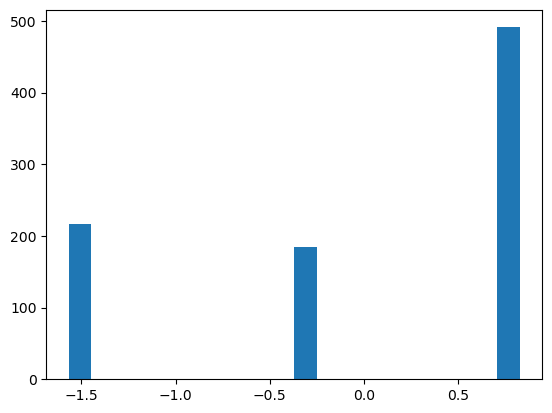

In [31]:
plt.hist(df_scaled[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

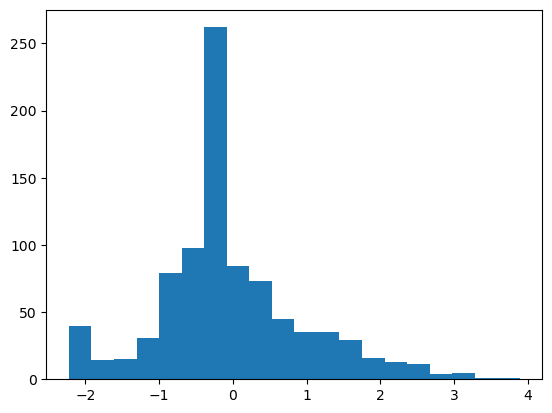

In [32]:
plt.hist(df_scaled[:,2],bins=20)
# Here the plot is somewhat gaussian

**Min Mix Scaling (CNN)** for deep learning techniques.
This Min Max scaling scales all the values in the dataframe to the values between 0 and 1. 
X_scaled = (X-X.min)/(X.max-X.min)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

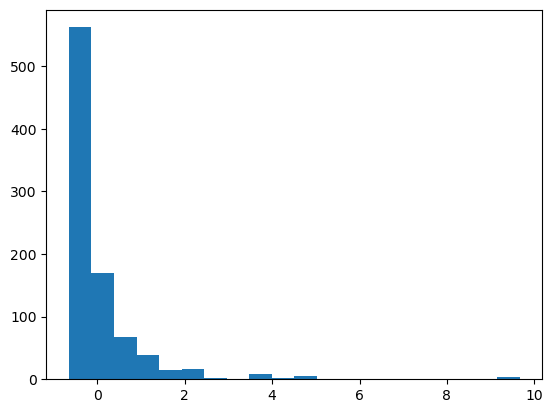

In [33]:
plt.hist(df_scaled[:,3],bins=20)
# Here the plot is right skewed

In [34]:
# this is especially used for pixels. If all the pixels are between 0 and 255, then they can be scaled to between 0 and 1 using min max scaling.
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns = df.columns)

In [35]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [36]:
# Independent and Dependent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


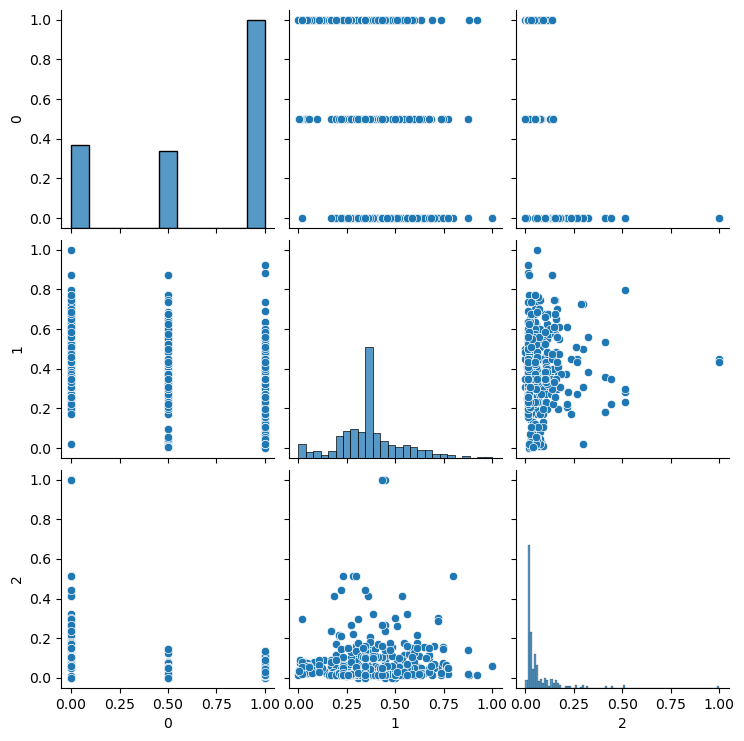

In [38]:
import seaborn as sns
sns.pairplot(df_minmax)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

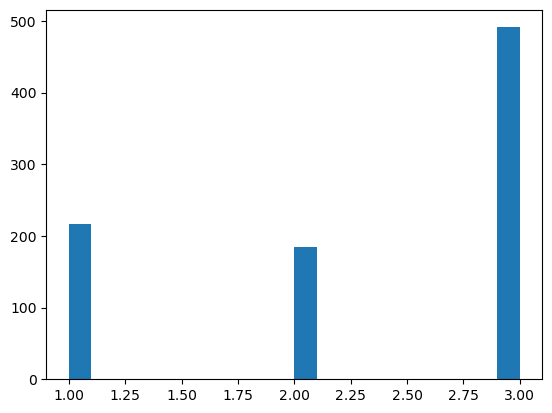

In [39]:
plt.hist(df['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

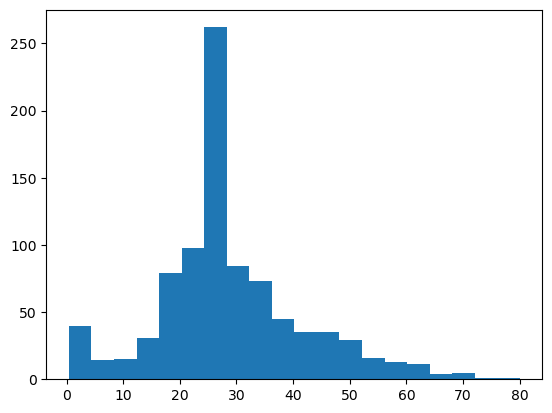

In [40]:
plt.hist(df.Age, bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

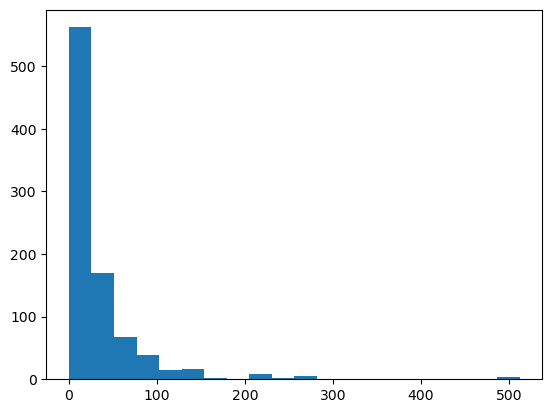

In [41]:
plt.hist(df.Fare, bins=20)

**Robust Scaler**
This is robust to outliers. It is used for scaling the features to median and quantiles. Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing it by the IQR-inter quantile range.
IQR = 75thquantile - 25thquantile
X_scaled = (X-X_median)/IQR.
9-90 percentile means 90% of values less than 9.

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [46]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [47]:
scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

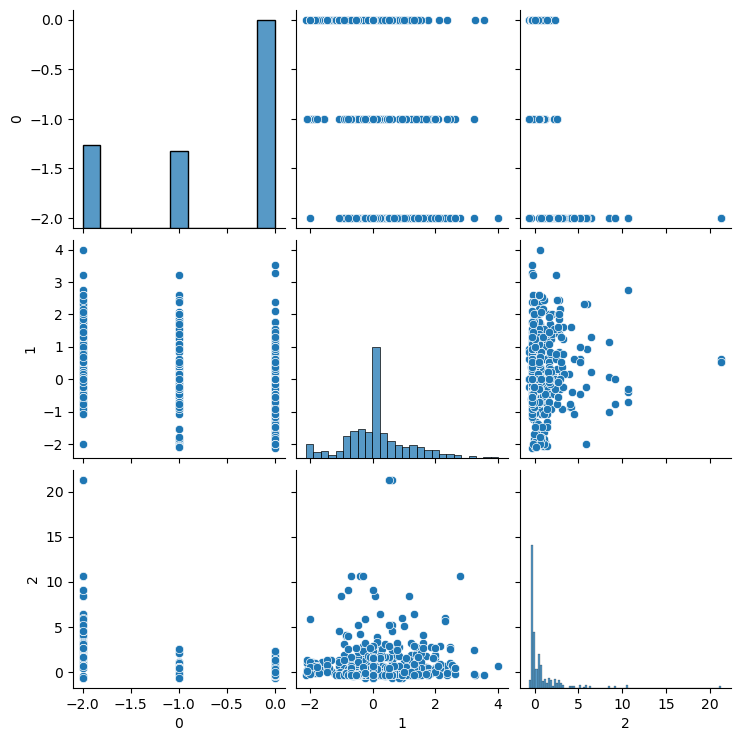

In [49]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

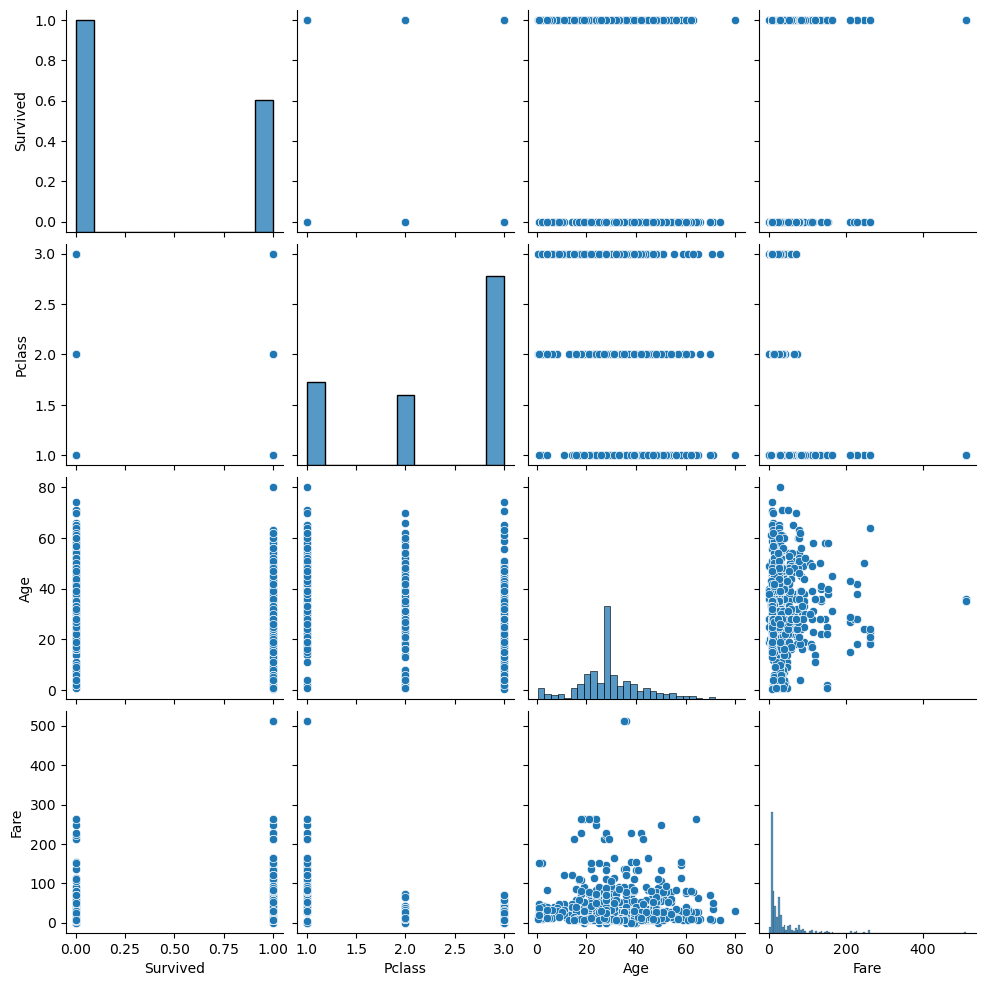

In [51]:
import seaborn as sns
sns.pairplot(df)

**Guassian Transformation**


Some ML algorithms like linear and logistic regression assume that the features are normally distributed for better accuracy and performance.
* logarthmic, reciprocal, square root, exponential, booxcox tranformations are the ones that are used here. 

In [54]:
df = pd.read_csv('/kaggle/input/titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
# filling the NaN values for better accuracy of the model
df['Age'] = df['Age'].fillna(df.Age.median())

In [56]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [57]:
import matplotlib.pyplot as plt

In [65]:
import scipy.stats as stat #scipy sub package is mainly used for probabilistic distributions and statistical operations.
import pylab #PyLab is a procedural interface to the Matplotlib object-oriented plotting library. Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib; and PyLab is a module that gets installed alongside Matplotlib.
#PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space. Although many examples use PyLab, it is no longer recommended.'''

In [60]:
# Here w will check if the feature is guassian or normal distributed
# For this we make use of Q-Q plot.

In [66]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6),dpi=100)
    plt.subplot(1,2,1) # this means the figure has 1 row,2 columns,this plot is the first plot.
    df[feature].hist() 
    plt.subplot(1,2,2) # this means the fig has 1 row, 2 columns, this is the second plot
    stat.probplot(df[feature],dist='norm',plot = pylab) #It generates a probabolity plot of sample data against the quantities of a specified theoretical distributon(normal distribution by default).probplot optionally calculates a best-fit line for the data and plots the results using matplotlib or a given plot function.
    plt.show()
    

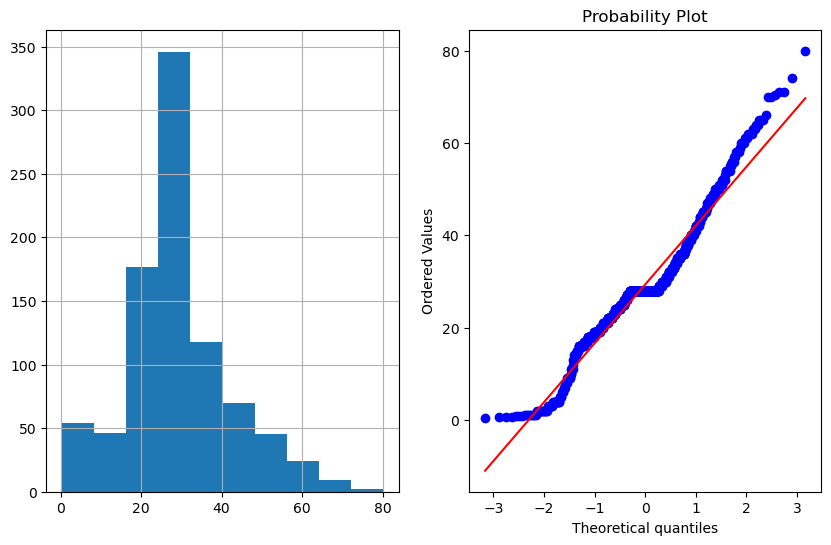

In [62]:
plot_data(df,'Age') #this looks like a right skewed

**Logarthmic Tranformation technique**

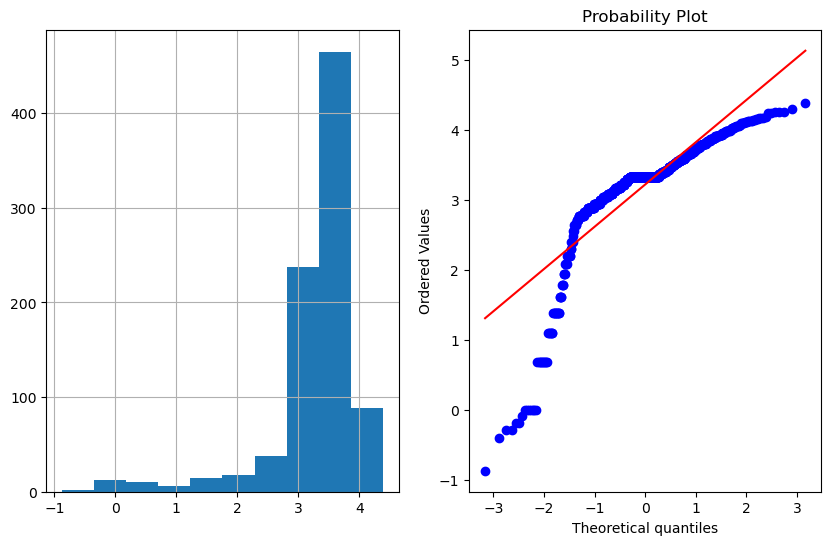

In [70]:
import numpy as np
df['Age_log'] = np.log(df.Age)
plot_data(df,'Age_log')
#Now it has become a left skewed and is also undesired.

**Reciprocal transformation technique**

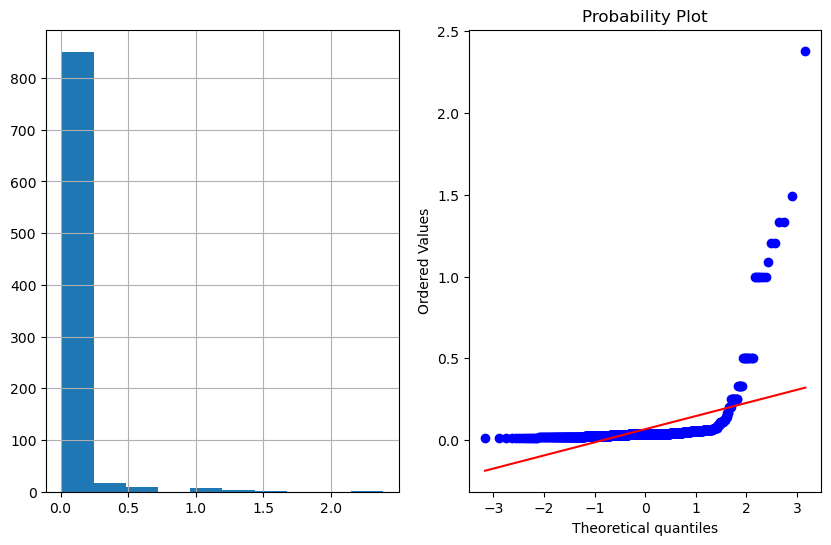

In [71]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

**Square root transformation technique**

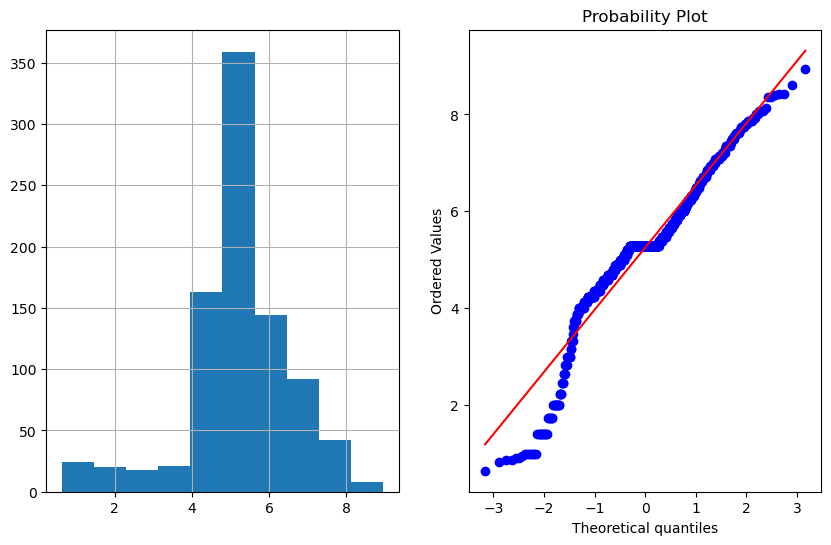

In [73]:
df['Age_sqroot'] = df.Age**(1/2)
plot_data(df,'Age_sqroot') #somewha guassian distribution.

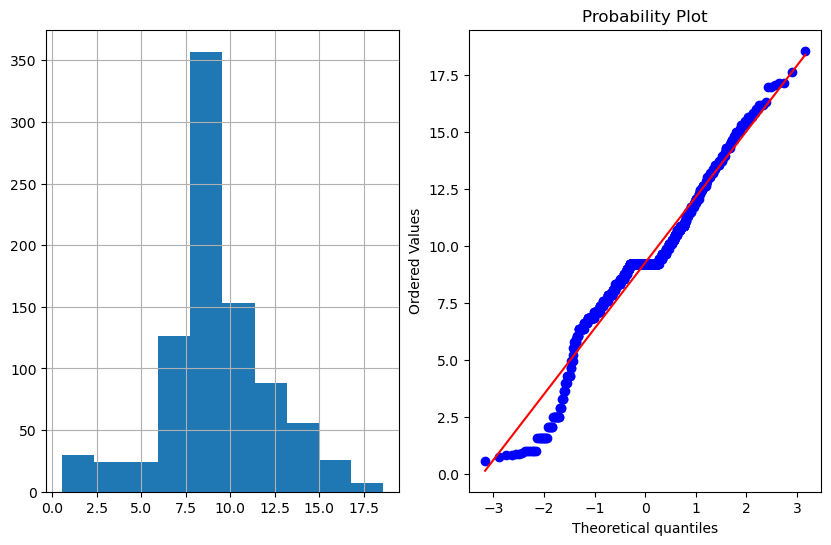

In [80]:
#exponential transformatioon technique
df['Age_exp'] = df.Age**(1/1.5)
plot_data(df,'Age_exp') #a much better result

**BoxCox Transformation**


The boxcox transformation is defind as:
T(Y)=(Y exp(lamba) - 1)/lambda
Where Y is the response variable and lambda is the transformation parameter. Lambda varies from -5 to 5. In the transformation, all the values of lambda are considered and the optimal value for a given variable is selected.

In [81]:
df['Age_boxcox'], parameters = stat.boxcox(df.Age)

In [82]:
print(parameters)

0.7964531473656952


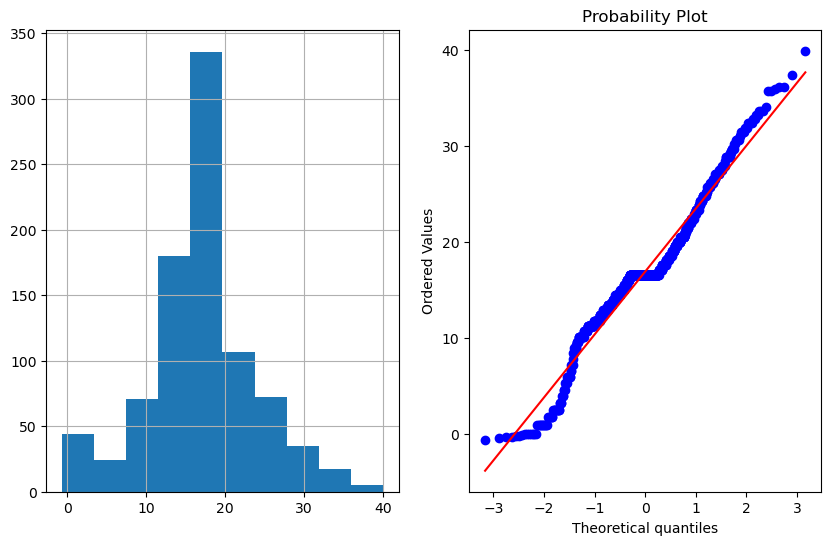

In [83]:
plot_data(df,'Age_boxcox') #this is a much better technique.

*Similarly we have to do the above analysis for each and every feature.*